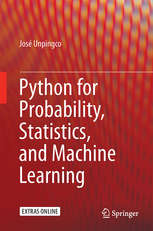

In [1]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [2]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this section, we  consider the famous Gauss-Markov problem which will give
us an opportunity to use all the material we have so far developed. The
Gauss-Markov model is the fundamental model for noisy parameter estimation because it
estimates unobservable parameters given a noisy indirect measurement.
Incarnations of the same model appear in all studies of Gaussian models. This
case is an excellent opportunity to use everything we have so far learned about
projection and conditional expectation.

Following Luenberger [[luenberger1968optimization]](#luenberger1968optimization) let's  consider the
following problem:

$$
\mathbf{y} = \mathbf{W} \boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

 where $\mathbf{W}$ is a $ n \times m $ matrix, and $\mathbf{y}$ is a
$n \times 1$ vector. Also, $\boldsymbol{\epsilon}$ is a $n$-dimensional normally
distributed random vector with zero-mean and covariance,

$$
\mathbb{E}( \boldsymbol{\epsilon} \boldsymbol{\epsilon}^T) = \mathbf{Q}
$$

 Note that engineering systems usually provide a *calibration mode*
where you can estimate $\mathbf{Q}$ so it's not fantastical to assume you have
some knowledge of the noise statistics. The problem is to find a matrix
$\mathbf{K}$ so that $ \boldsymbol{\hat{\beta}}=\mathbf{K} \mathbf{y}$
approximates $ \boldsymbol{\beta}$.  Note that we only have knowledge of
$\boldsymbol{\beta}$ via $ \mathbf{y}$ so we can't measure it directly.
Further, note that $\mathbf{K} $ is a matrix, not a vector, so there are $m
\times n$ entries to compute. 

We can approach this problem the usual way by trying to solve the MMSE
problem:

$$
\min_K\mathbb{E}(\Vert\boldsymbol{\hat{\beta}}-\boldsymbol{\beta} \Vert^2)
$$

 which we can write out as

$$
\min_K \mathbb{E}(\Vert \boldsymbol{\hat{\beta}}-\boldsymbol{\beta} \Vert^2) =  \min_K\mathbb{E}(\Vert \mathbf{K}\mathbf{y}- \boldsymbol{\beta} \Vert^2) =  \min_K\mathbb{E}(\Vert \mathbf{K}\mathbf{W}\mathbf{\boldsymbol{\beta}}+\mathbf{K}\boldsymbol{\epsilon}- \boldsymbol{\beta} \Vert^2)
$$

 and since $\boldsymbol{\epsilon}$ is the only random variable here,
this simplifies to

$$
\min_K \Vert \mathbf{K}\mathbf{W}\mathbf{\boldsymbol{\beta}}-\boldsymbol{\beta} \Vert^2 + \mathbb{E}(\Vert\mathbf{K}\boldsymbol{\epsilon} \Vert^2)
$$

 The next step is to compute

$$
\mathbb{E}(\Vert\mathbf{K}\boldsymbol{\epsilon} \Vert^2) = \mathbb{E}(\boldsymbol{\epsilon}^T \mathbf{K}^T \mathbf{K}^T \boldsymbol{\epsilon})=\Tr(\mathbf{K \mathbb{E}(\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T) K}^T)=\Tr(\mathbf{K Q K}^T)
$$

 using the properties of the trace of  a matrix. We can assemble
everything as

$$
\min_K \Vert \mathbf{K W} \boldsymbol{\beta} -  \boldsymbol{\beta}\Vert^2 + \Tr(\mathbf{K Q K}^T)
$$

 Now, if we were to solve this for $\mathbf{K}$, it would be a
function of $ \boldsymbol{\beta}$, which is the same thing as saying that the
estimator, $ \boldsymbol{\hat{\beta}}$, is a function of what we are trying to
estimate, $\boldsymbol{\beta}$, which makes no sense. However, writing this out
tells us that if we had $\mathbf{K W}= \mathbf{I}$, then the first term
vanishes and the problem simplifies to

$$
\min_K \Tr(\mathbf{K Q K}^T)
$$

 with the contraint,

$$
\mathbf{KW} = \mathbf{I}
$$

 This requirement is the same as asserting that the estimator is unbiased,

$$
\mathbb{E}(\boldsymbol{\hat{\beta}})=\mathbf{KW}  \boldsymbol{\beta} =  \boldsymbol{\beta}
$$

 To line this problem up with our earlier work, let's consider  the
$i^{th}$ column of $\mathbf{K}$, $\mathbf{k}_i$. Now, we can re-write the
problem as

$$
\min_k (\mathbf{k}_i^T \mathbf{Q} \mathbf{k}_i)
$$

 with

$$
\mathbf{k}_i^T \mathbf{W} = \mathbf{e}_i
$$

 and from our previous work on contrained optimization, we know the
solution to this:

$$
\mathbf{k}_i  = \mathbf{Q}^{-1} \mathbf{W}(\mathbf{W}^T \mathbf{Q^{-1} W})^{-1}\mathbf{e}_i
$$

 Now all we have to do is stack these together for the general solution:

$$
\mathbf{K}  = (\mathbf{W}^T \mathbf{Q^{-1} W})^{-1} \mathbf{W}^T\mathbf{Q}^{-1}
$$

 It's easy when you have all of the concepts lined up! For completeness, the
covariance of the error is

$$
\mathbb{E}(\hat{\boldsymbol{\beta}}-\boldsymbol{\beta}) (\hat{\boldsymbol{\beta}}-\boldsymbol{\beta})^T = \mathbb{E}(\mathbf{K} \boldsymbol{\epsilon} \boldsymbol{\epsilon}^T \mathbf{K}^T)=\mathbf{K}\mathbf{Q}\mathbf{K}^T =(\mathbf{W}^T \mathbf{Q}^{-1} \mathbf{W})^{-1}
$$

<!-- # !bc pycod -->
<!-- # from mpl_toolkits.mplot3d import proj3d -->
<!-- # from numpy.linalg import inv -->
<!-- # import matplotlib.pyplot as plt -->
<!-- # import numpy as np -->
<!-- # from numpy import matrix, linalg, ones, array -->
<!-- # Q = np.eye(3)*.1 # error covariance matrix -->
<!-- # beta = matrix(ones((2,1))) # this is what we are trying estimate -->
<!-- # W = matrix([[1,2], -->
<!-- #             [2,3], -->
<!-- #             [1,1]]) -->
<!-- # ntrials = 50 -->
<!-- # epsilon = np.random.multivariate_normal((0,0,0),Q,ntrials).T -->
<!-- # y=W*beta+epsilon -->
<!-- # -->
<!-- # K=inv(W.T*inv(Q)*W)*matrix(W.T)*inv(Q) -->
<!-- # b=K*y #estimated beta from data -->
<!-- # -->
<!-- # fig = plt.figure() -->
<!-- # fig.set_size_inches([6,6]) -->
<!-- # -->
<!-- # # some convenience definitions for plotting -->
<!-- # bb = array(b) -->
<!-- # bm = bb.mean(1) -->
<!-- # yy = array(y) -->
<!-- # ax = fig.add_subplot(111, projection='3d') -->
<!-- # -->
<!-- # ax.plot3D(yy[0,:],yy[1,:],yy[2,:],'mo',label='y',alpha=0.3) -->
<!-- # ax.plot3D([beta[0,0],0],[beta[1,0],0],[0,0],'r-',label=r'$\beta$') -->
<!-- # ax.plot3D([bm[0],0],[bm[1],0],[0,0],'g-',lw=1,label=r'$\widehat{\beta}_m$') -->
<!-- # ax.plot3D(bb[0,:],bb[1,:],0*bb[1,:],'.g',alpha=0.5,lw=3,label=r'$\hat{\beta}$') -->
<!-- # ax.legend(loc=0,fontsize=18) -->
<!-- # plt.show() -->
<!-- # !ec -->

<!-- dom:FIGURE: [fig-statistics/Gauss_Markov_001.png, width=500 frac=0.85] The red circles show the points to be estimated in the *xy*-plane by the black points. <div id="fig:Gauss_Markov_001"></div> -->
<!-- begin figure -->
<div id="fig:Gauss_Markov_001"></div>

<p>The red circles show the points to be estimated in the <em>xy</em>-plane by the black points.</p>
<img src="fig-statistics/Gauss_Markov_001.png" width=500>

<!-- end figure -->


[Figure](#fig:Gauss_Markov_001) shows the simulated $\mathbf{y}$ data as red
circles. The black dots show the corresponding estimates,
$\boldsymbol{\hat{\beta}}$ for each sample. The black lines show the true value
of $\boldsymbol{\beta}$ versus the average of the estimated
$\boldsymbol{\beta}$-values, $\widehat{\boldsymbol{\beta}_m}$. The matrix
$\mathbf{K}$ maps the red circles in the corresponding dots. Note there are
many possible ways to map the red circles to the plane, but the $\mathbf{K}$ is
the one that minimizes the MSE for $\boldsymbol{\beta}$. 

**Programming Tip.**

Although the full source code is available in the corresponding
IPython Notebook, the following snippets provide a quick walkthrough. 
To simulate the target data, we define the relevant 
matrices below,

In [3]:
Q = np.eye(3)*0.1 # error covariance matrix
# this is what we are trying estimate
beta = matrix(ones((2,1))) 
W = matrix([[1,2],
            [2,3],
            [1,1]])

  Then, we generate the noise terms and create
the simulated data, $y$,

In [9]:
ntrials = 50 
epsilon = np.random.multivariate_normal((0,0,0),Q,ntrials).T 
y=W*beta+epsilon

<!-- dom:FIGURE: [fig-statistics/Gauss_Markov_002.png, width=500 frac=0.85] Focusing on the *xy*-plane in [Figure](#fig:Gauss_Markov_001), the dashed line shows the true value for $\boldsymbol{\beta}$ versus the mean of the estimated values $\widehat{\boldsymbol{\beta}}_m$. <div id="fig:Gauss_Markov_002"></div> -->
<!-- begin figure -->
<div id="fig:Gauss_Markov_002"></div>

<p>Focusing on the <em>xy</em>-plane in [Figure](#fig:Gauss_Markov_001), the dashed line shows the true value for $\boldsymbol{\beta}$ versus the mean of the estimated values $\widehat{\boldsymbol{\beta}}_m$.</p>
<img src="fig-statistics/Gauss_Markov_002.png" width=500>

<!-- end figure -->


[Figure](#fig:Gauss_Markov_002) shows more detail in the horizontal *xy*-plane
of [Figure](#fig:Gauss_Markov_001).  [Figure](#fig:Gauss_Markov_002) shows
the dots, which are individual estimates of $\boldsymbol{\hat{\beta}}$ from the
corresponding simulated $\mathbf{y}$ data. The dashed line is the true value
for $\boldsymbol{\beta}$ and the filled line ($\widehat{\boldsymbol{\beta}}_m$)
is the average of all the dots.  The gray ellipse provides an error ellipse
for the covariance of the estimated $\boldsymbol{\beta}$ values.  

**Programming Tip.**

Although the full source code is available in the corresponding
IPython Notebook, the following snippets provide a quick walkthrough of
the construction of [Figure](#fig:Gauss_Markov_002). To draw
the ellipse, we need to import the patch primitive,

In [5]:
# %matplotlib inline

# from  matplotlib.patches import Ellipse

 To compute the parameters of the error ellipse based on the
covariance matrix of the individual estimates of $\boldsymbol{\beta}$
in the `bm_cov` variable below,

In [6]:
# U,S,V = linalg.svd(bm_cov) 
# err = np.sqrt((matrix(bm))*(bm_cov)*(matrix(bm).T))
# theta = np.arccos(U[0,1])/np.pi*180

 Then, we draw the add the scaled ellipse
in the following,

In [7]:
# ax.add_patch(Ellipse(bm,err*2/np.sqrt(S[0]),
#                      err*2/np.sqrt(S[1]),
#                      angle=theta,color='gray'))

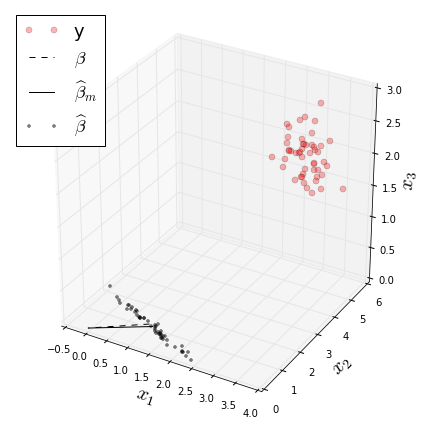

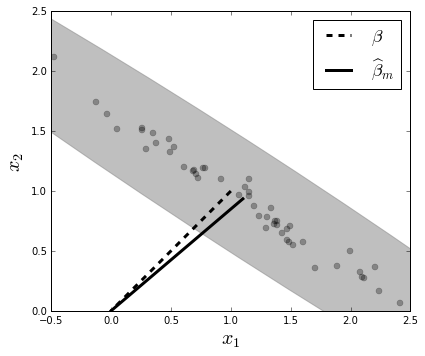

In [8]:
from __future__ import division
from mpl_toolkits.mplot3d import proj3d
from numpy.linalg import inv
import matplotlib.pyplot as plt
import numpy as np
from numpy import matrix, linalg, ones, array

Q = np.eye(3)*.1 # error covariance matrix

beta = matrix(ones((2,1))) # this is what we are trying estimate
W = matrix([[1,2],
            [2,3],
            [1,1]])

ntrials = 50 
epsilon = np.random.multivariate_normal((0,0,0),Q,ntrials).T 
y=W*beta+epsilon

K=inv(W.T*inv(Q)*W)*matrix(W.T)*inv(Q) 
b=K*y #estimated beta from data

fig = plt.figure()
fig.set_size_inches([6,6])

# some convenience definitions for plotting
bb = array(b)
bm = bb.mean(1)
yy = array(y)
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(yy[0,:],yy[1,:],yy[2,:],'ro',label='y',alpha=0.3)
ax.plot3D([beta[0,0],0],[beta[1,0],0],[0,0],'k--',label=r'$\beta$')
ax.plot3D([bm[0],0],[bm[1],0],[0,0],'k-',lw=1,label=r'$\widehat{\beta}_m$')
ax.plot3D(bb[0,:],bb[1,:],0*bb[1,:],'.k',alpha=0.5,lw=3,label=r'$\widehat{\beta}$')
ax.legend(loc=0,fontsize=18)
ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)
ax.set_zlabel('$x_3$',fontsize=20)
fig.tight_layout()

from  matplotlib.patches import Ellipse

fig, ax = plt.subplots()
fig.set_size_inches((6,6))
ax.set_aspect(1)
ax.plot(bb[0,:],bb[1,:],'ko',alpha=.3)
ax.plot([beta[0,0],0],[beta[1,0],0],'k--',label=r'$\beta$',lw=3)
ax.plot([bm[0],0],[bm[1],0],'k-',lw=3,label=r'$\widehat{\beta}_m$')
ax.legend(loc=0,fontsize=18)

bm_cov = inv(W.T*Q*W)
U,S,V = linalg.svd(bm_cov) 

err = np.sqrt((matrix(bm))*(bm_cov)*(matrix(bm).T))
theta = np.arccos(U[0,1])/np.pi*180

ax.add_patch(Ellipse(bm,err*2/np.sqrt(S[0]),err*2/np.sqrt(S[1])
                       ,angle=theta,color='gray',alpha=0.5))

ax.set_xlabel('$x_1$',fontsize=20)
ax.set_ylabel('$x_2$',fontsize=20)
fig.tight_layout()


<!-- References -->
<!-- --------------- -->
<!--  -->
<!-- * Luenberger, David G. *Optimization by vector space methods*. Wiley-Interscience, 1997. -->